In [1]:
import pandas as pd, matplotlib.pyplot as plt

In [2]:
dati_regioni=pd.read_json("./data/dati-json/dpc-covid19-ita-regioni.json", convert_dates=["data"])
aree = {
    "nord" : [1, 2, 3, 4, 5, 6, 7, 8],
    "centro" : [9, 10, 11, 12],
    "sud" : [13, 14, 15, 16, 17, 18, 19, 20] # 13 abruzzo, 20 sardegna
}

def get_area(codice):
    for k, v in aree.items():
        if int(codice) in v:
            return k

In [3]:
dati_regioni['area']=dati_regioni['codice_regione'].map(get_area)

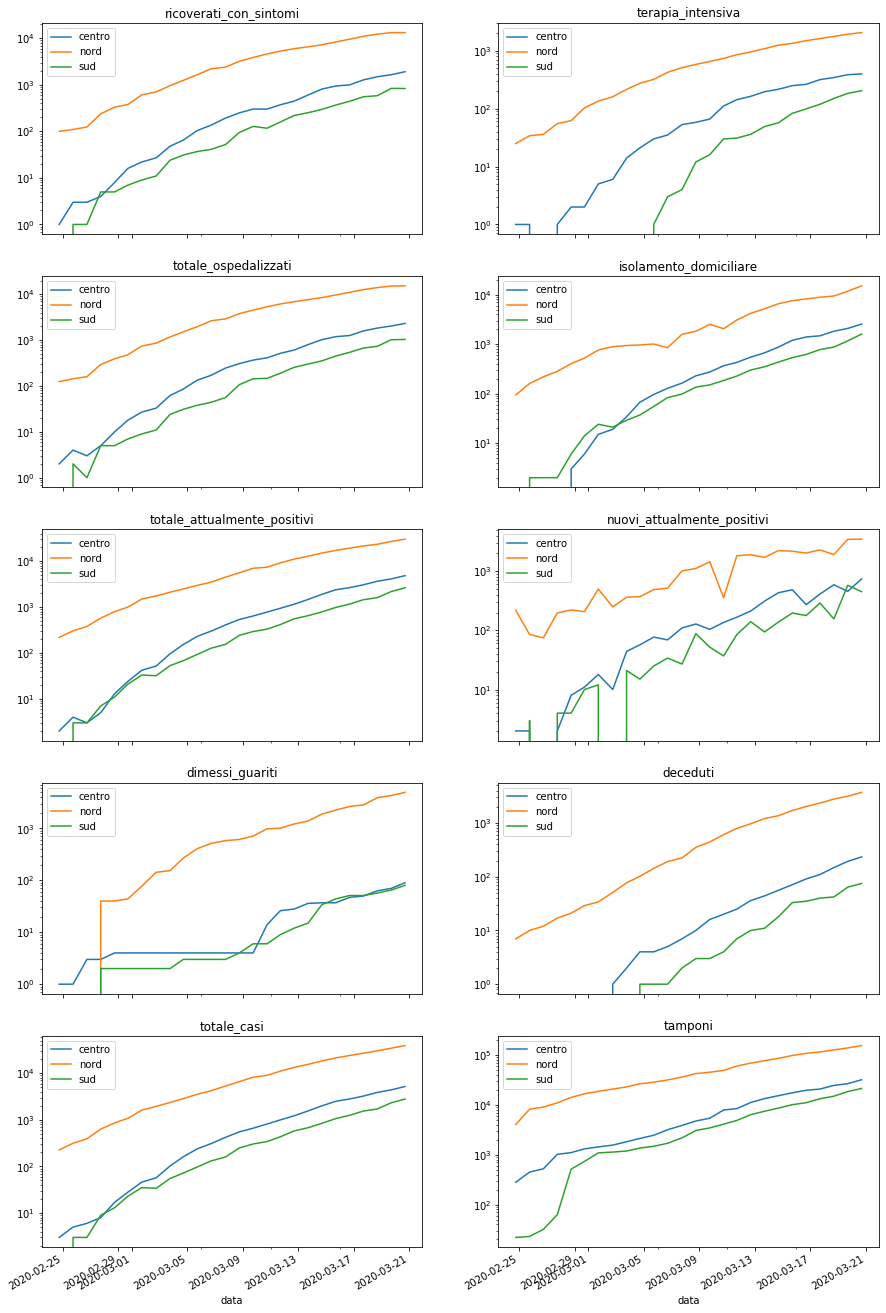

In [4]:
colonne = [
    "ricoverati_con_sintomi",
    "terapia_intensiva",
    "totale_ospedalizzati",
    "isolamento_domiciliare",
    "totale_attualmente_positivi",
    "nuovi_attualmente_positivi",
    "dimessi_guariti",
    "deceduti",
    "totale_casi",
    "tamponi"
]
fig, axes = plt.subplots(5,2,sharex=True,sharey=False,figsize=(15,25))
# setting sharey=True makes it more significative, but most plots  are white rectangles.
i=0
    
for c in colonne:
    ax = axes.flatten()[i]
    ax.semilogy()
    i += 1
    for n,t in dati_regioni.groupby("area"):
        t.groupby("data").sum().plot(y=c, ax=ax, label=n, title=c)